# Prediction using Supervised ML
---



***Author : AMINE MUSTAPHA***

**Required Libraries**

In [143]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

**1 -Dataset Informations**

In [3]:
# Reading data from the remote link
data = pd.read_csv("http://bit.ly/w-data",sep=',')

In [5]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#data describtion (mean,median,min,max,...)
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
#ploting data points (x=hours,y=Scores) and see if we can manually find any relationship between the data
fig = px.scatter(data, x="Hours",y="Scores",title="Study Hours vs Scores")
fig.show()


**==> We can see that there is a positive linear relationship between the number of hours studied and the score for Students**

# Data preparation

In [86]:
X=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values

In [89]:
#spliting data into training and testing sets.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Creating a model and fiting it

In [90]:
#train the algorithm
model = LinearRegression().fit(X_train, y_train)

**The attributes of the Model**

In [92]:
print('intercept:', model.intercept_)
print('slope:', model.coef_[0])


intercept: 2.018160041434662
slope: 9.91065648064224


**Plotting the regression line**

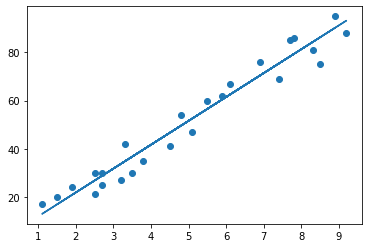

In [123]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


# Making predictions

In [149]:
#making predictions on the testing data
y_pred = model.predict(X_test)

In [137]:
d = {'Acual': y_test, 'Predicted': y_pred}
results=pd.DataFrame(data=d)
results

,Acual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Prediction for the Student with 9.25 hour of Studies/day**

In [148]:
x=9.25
y_res= model.intercept_ + model.coef_ * x
print('predicted Score for the student:', y_res[0])

predicted Score for the student: 93.69173248737539


# Evaluating the model

**The coefficient of determination (𝑅²)**

In [146]:
r_sq = model.score(X,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9526947647057273


R² gives us a measure of how well the actual outcomes are replicated by the model or the regression line. This is based on the total variation of prediction explained by the model. R² is always between 0 and 1 or between 0% to 100%,in our case R² equals to 95%

**MAE (Mean Absolute Error)**

In [150]:
k = mae(y_pred,y_test)
print('Mean Absolute Error   :', k )

Mean Absolute Error   : 4.183859899002982
